# Fundamentals of Machine Learning - Exercise 2
* The aim of the exercise is to learn basic techniques for visualization creation and interpretation using Matplotlib and Seaborn libraries.

![meme02](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_02_meme_02.png?raw=true)

# Exploratory data analysis

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Import used packages

In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame - in our case it is a csv file
* https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv

In [44]:
df_full = pd.read_csv('https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv')

## Price is the most interisting attribute in our dataset, let's take a look on its distribution
- SalePrice

## Vizualize house prices in form of histogram
- What does it tell us about the prices?

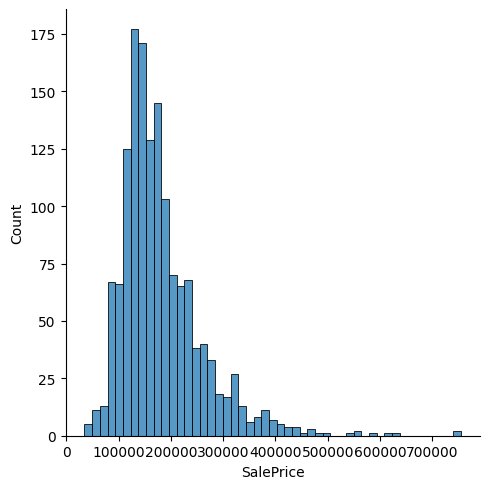

In [ ]:
sns.displot(df_full.SalePrice)

### Modify bins
- Perhaps we want to visualize the histogram with more dense or coarse bins
- *bins* attribute

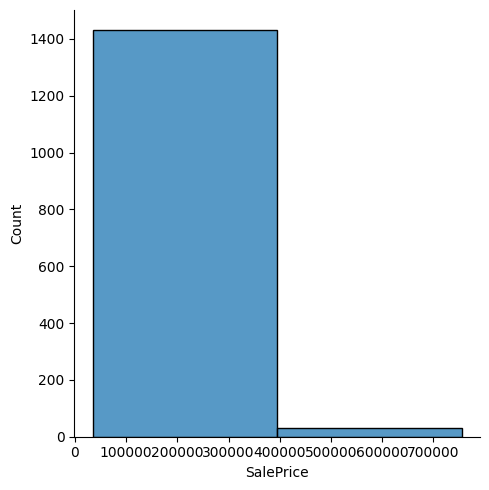

In [ ]:
sns.displot(df_full.SalePrice,bins=2)

### Use quartiles (Q1, Q3) for highlighting most common price range in histogram

* Check functions *describe* and *quantile* over price column

In [ ]:
df_full.SalePrice.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [ ]:
df_full.SalePrice.quantile(0.75)

214000.0

## 🔎 What can we say about prices based on the quantiles?
### Use function *axvline* from Matplotlib to draw vertical lines at the quartile positions

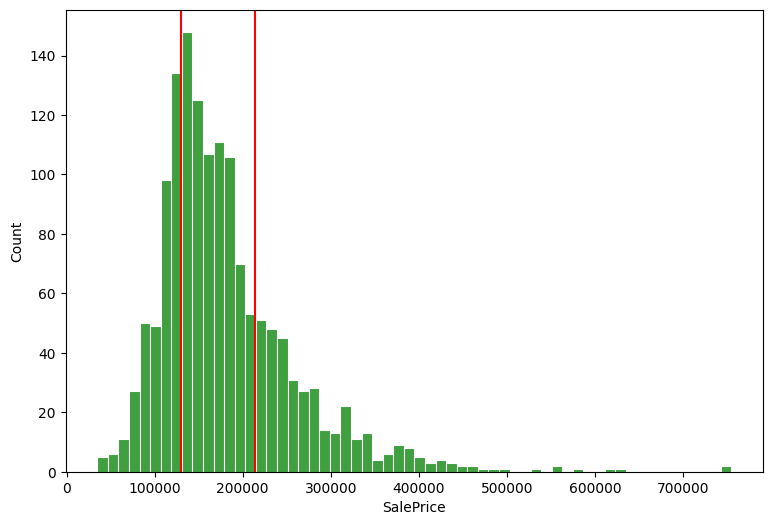

In [ ]:
fig = plt.figure(figsize=(9,6))
sns.histplot(df_full.SalePrice,bins=60,edgecolor='white',color="green")
plt.axvline(df_full.SalePrice.quantile(0.25),color='red')
plt.axvline(df_full.SalePrice.quantile(0.75),color='red') #75 procent domu je levnejsi nez 210 ...

## 📊 Let's add more complexity to histogram vizualizations.
### Does price change for different values of GaragaFinish attribute?

### GarageFinish: Interior finish of the garage
- Fin	Finished
- RFn	Rough Finished
- Unf	Unfinished
- NA	No Garage

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

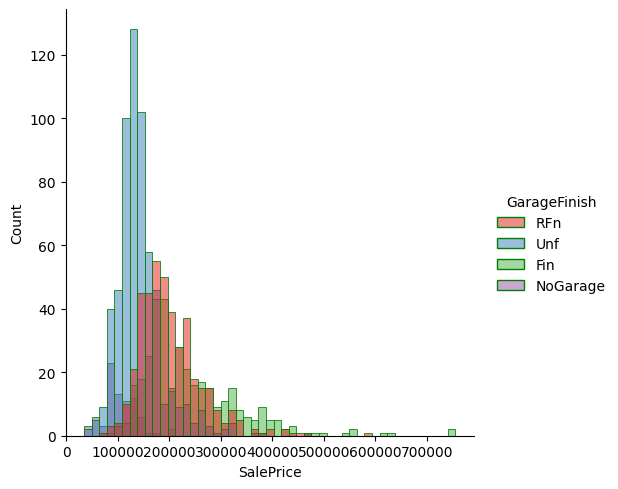

In [10]:
sns.displot(data=df_full, x= "SalePrice",hue =  "GarageFinish", edgecolor= "green", palette = "Set1" )

### 💡 We can see that houses with no garage are somehow missing
- The no garage houses have a *nan* value in the feature so they are not plotted

### Fill nan values with 'NoGarage' string

In [9]:
df_full['GarageFinish'] = df_full.GarageFinish.fillna('NoGarage')

### Take a look at the histogram again

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

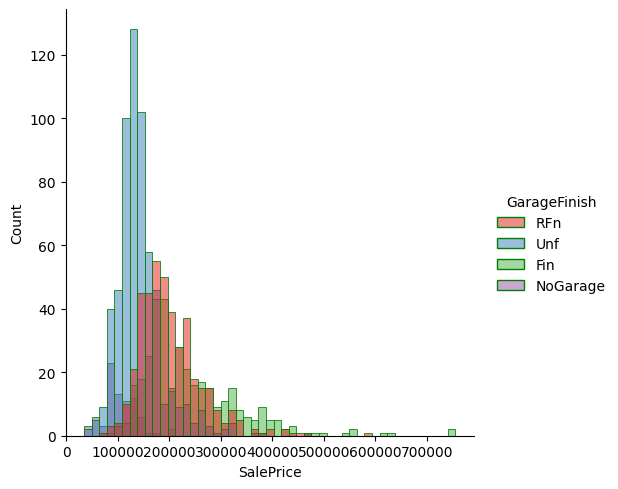

In [11]:
sns.displot(data=df_full, x= "SalePrice",hue =  "GarageFinish", edgecolor= "green", palette = "Set1" )

## 💡 Sometimes the histograms distinguished by colors are not easily redeable
- We can use *col* attribute to automatically plot every histogram on its own canvas

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

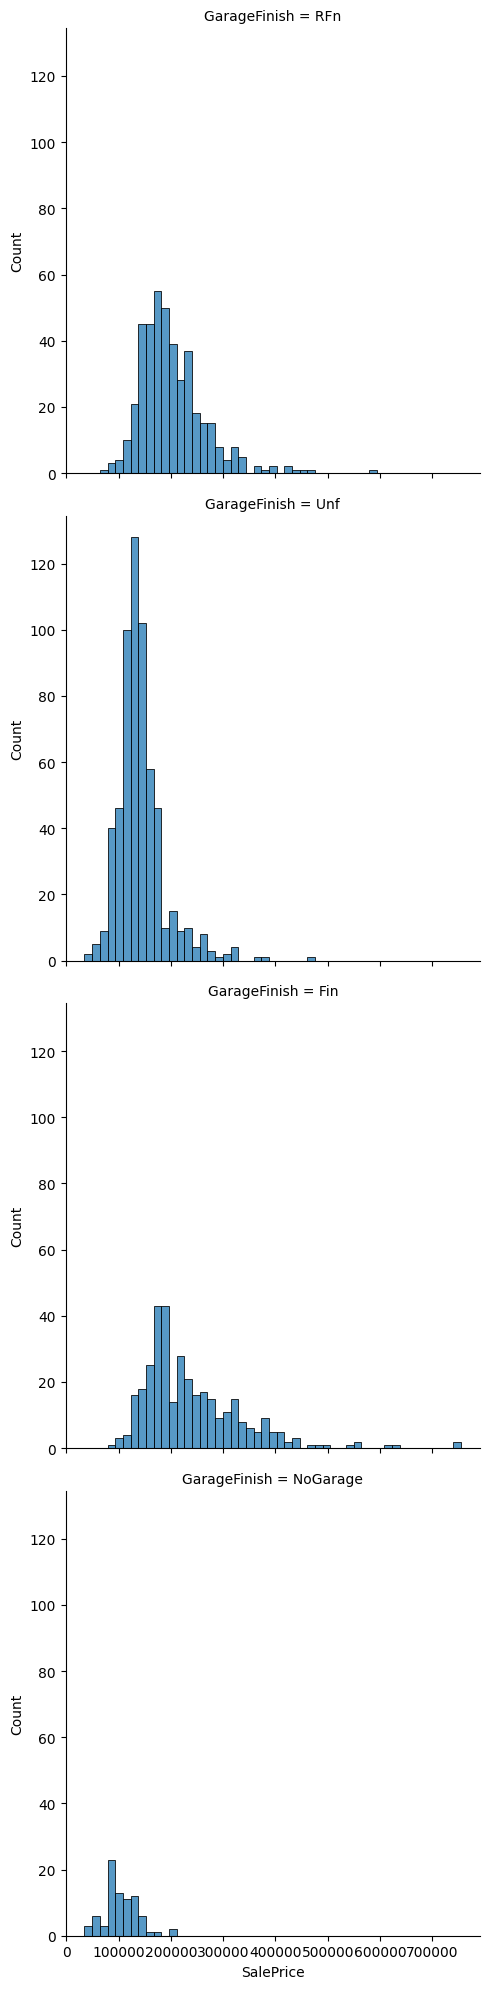

In [12]:
sns.displot(data = df_full, x = 'SalePrice', row = 'GarageFinish')

# 📊 Another very useful tecnique for the numerical features distributions are boxplots
- 🔎 Did you see any of these before?

- 🔎 How should we read boxplots?
    - **Quartiles**
    - **Median**
    - Box size
    - **Outliers and IQR**
    - Min/max - with or without outliers

### Plot only the *SalePrice* using boxplot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='SalePrice'>

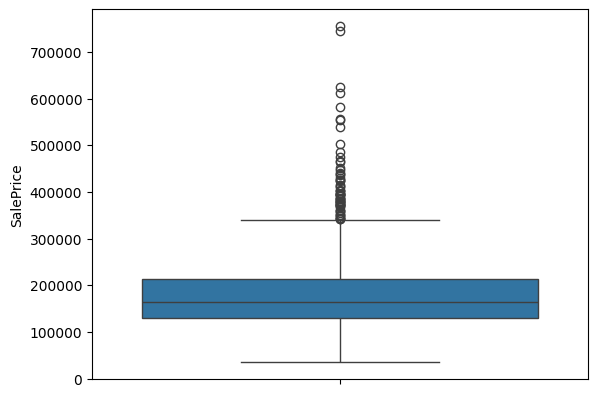

In [13]:
sns.boxplot(y='SalePrice', data=df_full)

## Let's take a look at the *SalePrice* for different *BldgType* values
- 🔎 What can we say about the prices?

<ipython-input-17-25c487a5c035>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BldgType', y='SalePrice', data=df_full,palette="Set1")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group

<Axes: xlabel='BldgType', ylabel='SalePrice'>

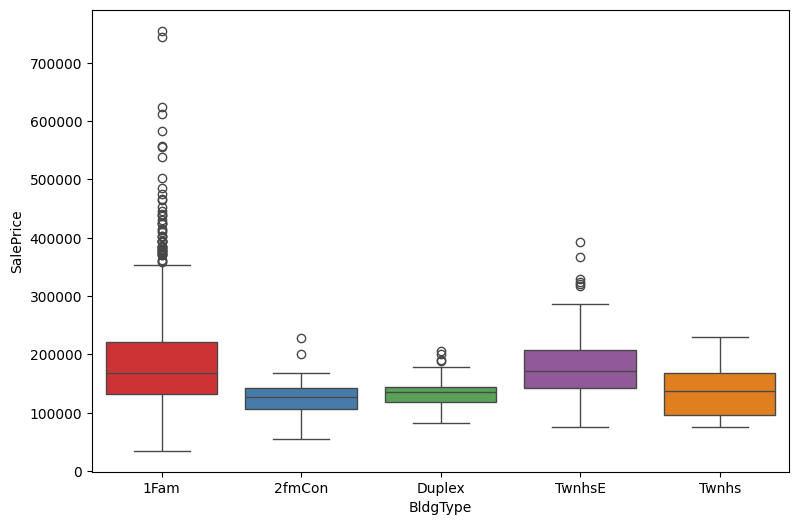

In [17]:
fig = plt.figure(figsize=(9,6))
sns.boxplot(x='BldgType', y='SalePrice', data=df_full,palette="Set1")

## We can do the same for *GrLivArea*

<ipython-input-18-37c282f138d2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BldgType', y='GrLivArea', data=df_full,palette="Set1")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group

<Axes: xlabel='BldgType', ylabel='GrLivArea'>

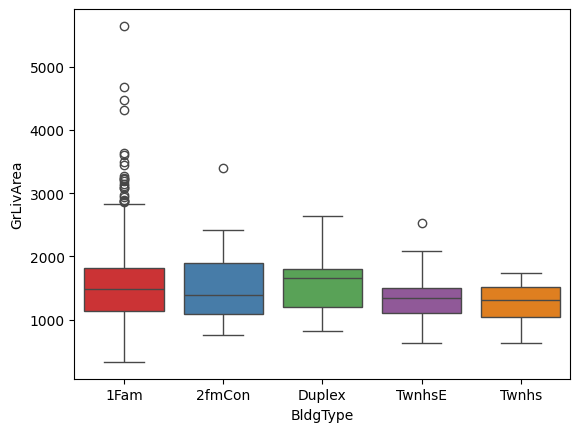

In [18]:
sns.boxplot(x='BldgType', y='GrLivArea', data=df_full,palette="Set1")

## Let's take a look at the *GrLivArea* for different *BldgType* values
- 🔎 What can we say about the GrLivArea?

# 📊 Scatter plots are commonly used for visualizing two numerical variables

### We can use standard *scatterplot* with *BldgType* as a *hue* so we can better grasp the relationship between *GrLivArea* and *SalePrice*
* Try to set *alpha* parameter for opacity settings

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

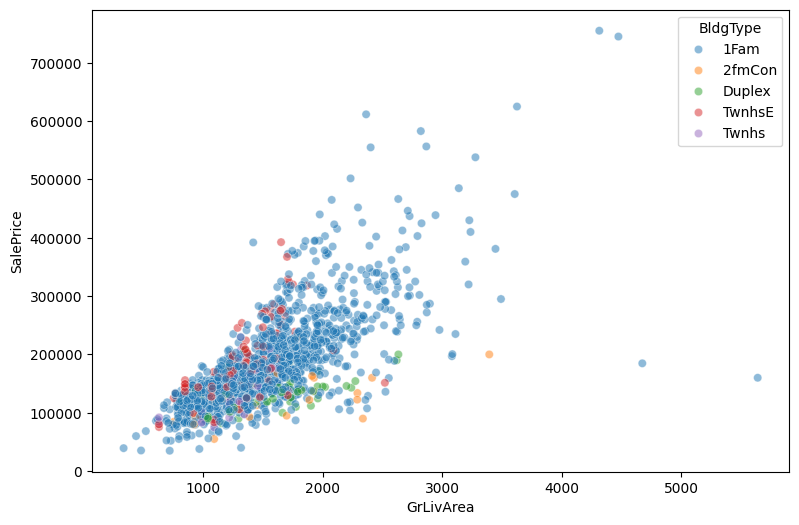

In [19]:
fig = plt.figure(figsize=(9,6))
sns.scatterplot(data=df_full, x='GrLivArea', y='SalePrice', hue='BldgType', alpha=0.5)

### We can see there are some outliers in the data, let's zoom only to area without them, how can we filter the data?

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

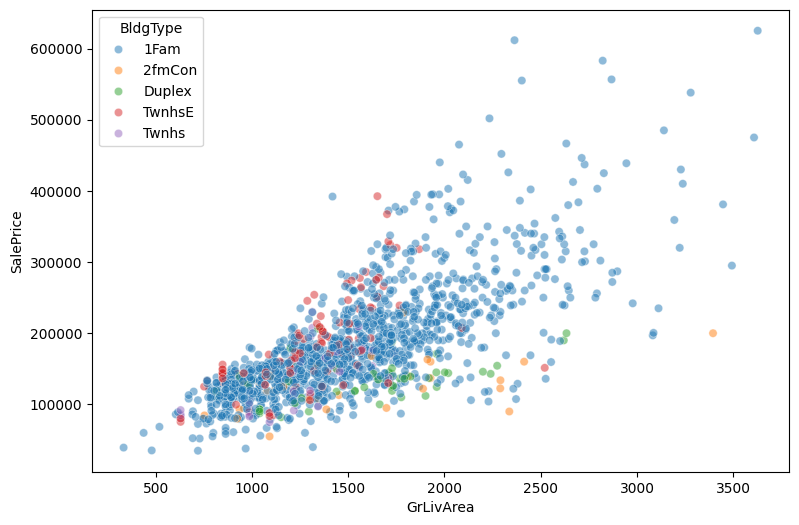

In [20]:
fig = plt.figure(figsize=(9,6))
sns.scatterplot(data=df_full[df_full.GrLivArea<4000], x='GrLivArea', y='SalePrice', hue='BldgType', alpha=0.5)

# We have an information about a month and a year for the sold houses.
## 🔎 Can you vizualize what was the average price of the house by quarters?

* We need to create a new column **YearQuarterSold** with merged Year and Quarter information in this pattern: '2010-1','2010-2' and so on first
    * We can map the values using the *apply* function or use string concatenation directly
* 💡 If you need to change data type of the columns, you can use *astype*

In [45]:
df_full['QuarterSold'] = df_full.MoSold // 4 + 1
df_full['YearQuarterSold'] = df_full.YrSold.astype(str) + '-' + df_full.QuarterSold.astype(str)

### Compute the average price for the *YearQuarterSold* attribute

In [46]:
yearqs = df_full.groupby('YearQuarterSold').SalePrice.mean().reset_index(name= "MeanPrice")
yearqs

,YearQuarterSold,MeanPrice
0,2006-1,190553.522727
1,2006-2,173835.900000
2,2006-3,197681.705128
3,2006-4,185545.000000
4,2007-1,178489.159091
5,2007-2,180689.732955
6,2007-3,194509.890110
7,2007-4,214414.500000
8,2008-1,173837.951220
9,2008-2,173830.396341


## Vizualize the data using *lineplot*
- In case of xlabels mixing try to tune the *rotation* and *horizontalalignment* parameters

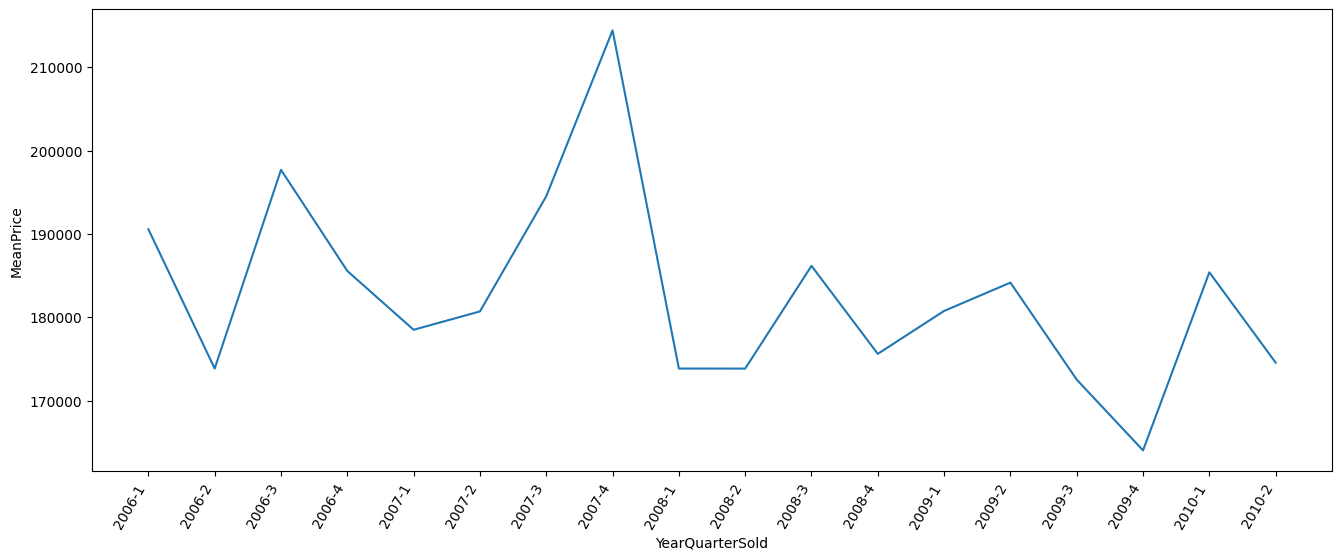

In [47]:
fig = plt.figure(figsize=(16,6))
sns.lineplot(data=yearqs, x= "YearQuarterSold", y = "MeanPrice")
plt.xticks(rotation=60, horizontalalignment='right')
plt.show()

### Add the max, min and median to the plot
- Use *describe* and the [Pandas Melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) function
    - use YearQuarterSold as an *id_vars*
    - use 'min', 'mean', '50%', 'max' as *value_vars*

In [48]:
df_full.groupby('YearQuarterSold').SalePrice.describe().reset_index()

,YearQuarterSold,count,mean,std,min,25%,50%,75%,max
0,2006-1,44.0,190553.522727,71075.435079,52500.0,142875.0,172700.0,228250.0,423000.0
1,2006-2,180.0,173835.900000,78147.648285,79000.0,129675.0,157500.0,197725.0,625000.0
2,2006-3,78.0,197681.705128,86560.713023,35311.0,133625.0,178000.0,244933.5,465000.0
3,2006-4,12.0,185545.000000,69292.448559,98600.0,132000.0,175000.0,236000.0,290000.0
4,2007-1,44.0,178489.159091,119137.563987,39300.0,122000.0,145450.0,200125.0,755000.0
5,2007-2,176.0,180689.732955,82447.813812,79000.0,129000.0,156000.0,205787.5,745000.0
6,2007-3,91.0,194509.890110,72455.235610,64500.0,137500.0,181000.0,238500.0,392000.0
7,2007-4,18.0,214414.500000,81118.090800,84500.0,144750.0,231000.0,268975.0,340000.0
8,2008-1,41.0,173837.951220,73278.323817,55000.0,127000.0,159895.0,192000.0,412500.0
9,2008-2,164.0,173830.396341,63180.075472,40000.0,135000.0,165200.0,200450.0,385000.0


![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_02_meme_01.png?raw=true)

In [49]:
df_agg = df_full.groupby('YearQuarterSold').SalePrice.describe().reset_index()
df_melt = pd.melt(df_agg, id_vars=['YearQuarterSold'], value_vars=['min', 'mean', '50%', 'max'])
df_melt

,YearQuarterSold,variable,value
0,2006-1,min,52500.0
1,2006-2,min,79000.0
2,2006-3,min,35311.0
3,2006-4,min,98600.0
4,2007-1,min,39300.0
...,...,...,...
67,2009-2,max,555000.0
68,2009-3,max,402861.0
69,2009-4,max,263435.0
70,2010-1,max,611657.0


## What can we say about the minimum and maximum values?
- 💡Take a look at std. deviation

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

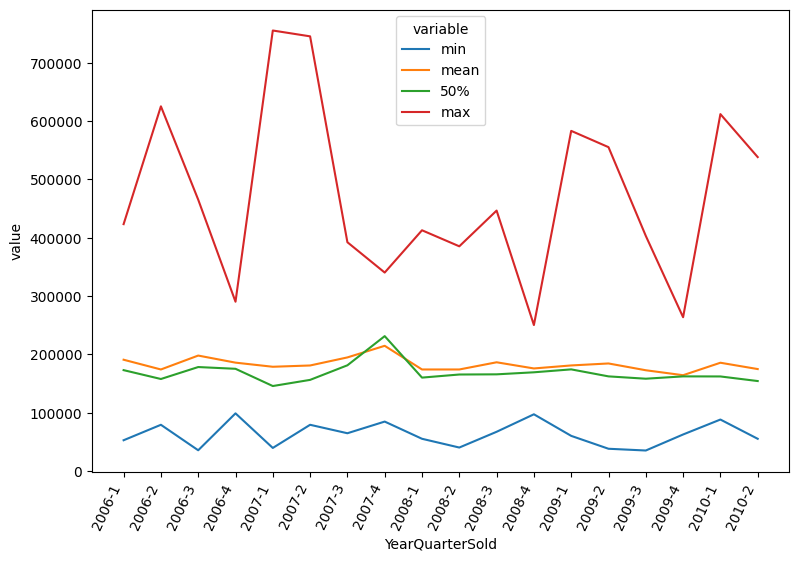

In [50]:
fig = plt.figure(figsize=(9,6))
sns.lineplot(data=df_melt, x='YearQuarterSold', y='value', hue='variable')
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

# We can take a look at number of sold houses for the defined time periods as well
## 📊 We will use standard bar plot
- 🔎 In which quarter were the most houses sold?
- 💡 Fun facts: [https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home](https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home)

In [51]:
df_cnt = df_full.groupby('YearQuarterSold').SalePrice.count().reset_index(name= "Count")
df_cnt

,YearQuarterSold,Count
0,2006-1,44
1,2006-2,180
2,2006-3,78
3,2006-4,12
4,2007-1,44
5,2007-2,176
6,2007-3,91
7,2007-4,18
8,2008-1,41
9,2008-2,164


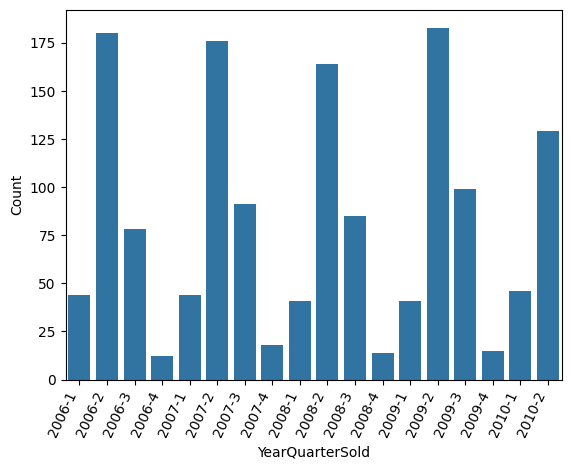

In [52]:
sns.barplot(data=df_cnt, x='YearQuarterSold', y='Count')
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

# Tasks (2p)
## ✅ Task 1 - Outlier detection (1p)
- We need to somehow mark the outliers in the data according to the *SalePrice* and *GrLivArea*
    - One possibility is to compute [IQR](https://www.statisticshowto.com/probability-and-statistics/interquartile-range/) for both columns and mark outliers using lower and upper bounds
    - Lower bound: Q1 - 1.5*IQR
    - Upper bound: Q3 + 1.5*IQR
- 💡 If the house has *SalePrice* **OR** *GrLivArea* value outside of the bounds - it is an outlier
- Vizualize the data using scatter plot and distinguish the outlier and non-outlier data using different colors (*hue*) 💡

## ✅ Task 2 - Describe what you see in the data (1p)
- Try to vizualize the relationship between *SalePrice* and *OverallQual*
    - 💡You can use BoxPlots, Scatter plots, etc., the choice of a right plot type is up to you 🙂
- Do the same for *SalePrice* and *OverallCond*; i.e. vizualize and describe insight-
- **Describe the insight you got from the plots with a few sentences in a Markdown cell below the plot**
    - ❌ Plot interpretation figured in real-time during task check is not allowed! ❌